# I. Introducción

El proyecto de *Machine Learning* desarrollado a continuación, tiene por objeto descifrar cuáles son los elementos clave a la hora de hacer una canción popular o viral, basándonos en lo puramente musical. Es decir, pretendemos conseguir predecir que una pista tenga un buen impacto mundialmente en la industria simplemente adaptándonos a una serie de características musicales.

Analizando el recorrido y los atributos referencia de las canciones más escuchadas en los últimos veinte años según Spotify, sacaremos gran parte de información puesto que tienen una amplia base de datos extráible gracias a su [**Spotify API**](https://developer.spotify.com/documentation/web-api). 
En ella, *Spotify* habla de características como la energía de la canción, el tono o incluso si es o no bailable en una escala de 1.0 a 0.0. 


Para la elaboración del proyecto, hemos accedido mediante las llamadas pertinentes a la API mencionada y desde la librería de Python *Spotipy*, dando uso de una serie de datasets en los que encontrábamos las canciones más escuchadas de las últimas dos décadas, hemos podido extraer lo necesario para dar vida a nuestro análisis de la popularidad de una canción. 

# II. Dataset

Los datasets han sido extraídos de la plataforma Kaggle, en este mismo [enlace](https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre). En él, trataban de darle una predicción de género a la música, nosotros lo utilizaremos en cambio como ejemplo para probar la predicción de la popularidad de una canción determinada.

In [6]:
import pandas as pd

In [11]:
popularity_df = pd.read_csv('./data/music_genre.csv')

In [12]:
popularity_df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

In [13]:
popularity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6


En el dataset observamos que no hay valores nulos, además de que tenemos 18 columnas, entre las cuales está nuestro target (popularity). 
La mayoría de las features son de tipo float, mientras que hay una minoría object que en función de la relación que tengan con nuestro target, 
se pasarán a numérico para poder trabajar con ellas o se eliminarán.
A continuación detallamos el significado de cada una de las columnas, estos atributos los ha desarrollado la documentación de la API de Spotify a la hora de analizar las bibliotecas de su propia interfaz para sus propias predicciones: 

In [14]:
popularity_df.head(3)

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941            0.7920  A#   
1       0.01270         0.622     218293.0   0.890            0.9500   D   
2       0.00306         0.620     215613.0   0.755            0.0118  G#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic

1.  Instance ID: Será el número identificativo de cada registro (fila).

2. Artist Name: El nombre del artista de la canción a evaluar.

3. Track Name: El título de la canción que estamos analizando.

4. Popularity: Nuestro target, lo que queremos predecir. Hace referencia al impacto social que tuvo la pieza musical en el momento.

5. Acousticness: Una medida de confianza entre 0 y 1 que hace alusión a si la canción es acústica o no, representando 1 el valor más alto de una 
alta confianza en que la canción sí que es acústica. Tienden hacia el uso de instrumentos analógicos y no-electrónicos. 

6. Danceability: describe cuán capaz es un track de hacernos bailar, basado en una combinación de elementos musicales como el tempo, la fuerza del beat, la regularidad y la estabilidad del ritmo. Siendo 0.0 el valor menos bailable y 1.0 el más bailable.

7. Duration Ms: La duración de la canción en milisegundos. 

8. Energy: Representa la medida de intensidad y actividad dentro de la canción. Habitualmente las canciones enérgicas, se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene muy alta energíamientras que Bach se quedaría muy bajo en la misma. La esencia de la energía de una canción la marcan el rango dinámico, el ruido, el timbre y la entropía general. Esta medida también va entre 0 y 1.

9. Instrumentalness: Evalúa si una canción tiene o no vocales y letra. El rap sería en este caso claramente vocal, por ejemplo. Cuanto más se acerca el valor a 1.0, mayor será la probabilidad de que el contenido de la canción carezca de vocales. Un valor mayor de 0.5 se interpretaría también como canción instrumental. 

10. Key: El tono en el que se produjo la pieza musical. 

11. Liveness: Detecta la presencia de una audiencia en la grabación de la canción. Cuanto mayor sea el valor, mayor será la probabilidad de que sea una canción grabada en un show en directo. 

12. Loudness: Se mide en dB. Se mide una media de todo el volumen y ruido de la canción en el total de su duración. Se mueven entre -60dB y 0dB.

13. Mode: Indica la escala melódica, si es mayor o menor. Mayor sería 1, mientras que menor sería 0.

14. Speechiness: detecta la presencia de palabras habladas en una canción, como una entrevista, un audiolibro o poesía. Cuanto más se acerque a 1.0, mayor será la presencia de palabras simplemente habladas. Mayor que 0.66 será que la mayoría de la pieza está hecha de palabras habladas. Entre 0.33 y 0.66 combinarán música y discurso. Menores que 0.33 representa música.
15. Tempo: El tempo estimado de una canción se mide en beats por minuto (BPM). En términos musicales, el tempo es la velocidad determinada de una pieza y deriva directamente de la duración media del beat. 

16. Time Signature: Especifica cuántos beats o golpes hay en cada barra. Es el compás. 

17. Valence : Una medida desde 0.0 a 1.0 que describe el positivismo musical que transmite una pista. Las canciones con *high valence* suenan más positivas (feliz, alegre, eufórica), mientras que las *low valence* suenan negativas (triste, deprimido, enfadado). 


En cuanto a la columna popularity, será el target de nuestro modelo. Trataremos de predecir la popularidad de una canción con todos los features anteriormente comentados que puede tener una pieza musical. 

In [15]:
popularity_df.describe()

instance_id    popularity  acousticness  danceability   duration_ms  \
count  50000.000000  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   55888.396360     44.220420      0.306383      0.558241  2.212526e+05   
std    20725.256253     15.542008      0.341340      0.178632  1.286720e+05   
min    20002.000000      0.000000      0.000000      0.059600 -1.000000e+00   
25%    37973.500000     34.000000      0.020000      0.442000  1.748000e+05   
50%    55913.500000     45.000000      0.144000      0.568000  2.192810e+05   
75%    73863.250000     56.000000      0.552000      0.687000  2.686122e+05   
max    91759.000000     99.000000      0.996000      0.986000  4.830606e+06   

             energy  instrumentalness      liveness      loudness  \
count  50000.000000      50000.000000  50000.000000  50000.000000   
mean       0.599755          0.181601      0.193896     -9.133761   
std        0.264559          0.325409      0.161637      6.162990   
min        0.000792          0.000000      0.009670    -47.046000   
25%        0.433000          0.000000      0.096900    -10.860000   
50%        0.643000          0.000158      0.126000     -7.276500   
75%        0.815000          0.155000      0.244000     -5.173000   
max        0.999000          0.996000      1.000000      3.744000   

        speechiness       valence  
count  50000.000000  50000.000000  
mean       0.093586      0.456264  
std        0.101373      0.247119  
min        0.022300      0.000000  
25%        0.036100      0.257000  
50%        0.048900      0.448000  
75%        0.098525      0.648000  
max        0.942000      0.992000

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

Si sacamos una tabla de correlación con mapa de calor, veremos que de nuestras 50,000 muestras no sacamos una relación lineal con el target, sin embargo, conociendo la materia podemos afirmar que sí que hay unos patrones en las canciones que se vuelven populares a nivel mundial, lo veremos más adelante. 
Esto nos va a servir para hacer pruebas con datasets más pequeños, que más tarde para el train/test final uniremos a este dataset tan grande, para que el costo computacional sea menor. 

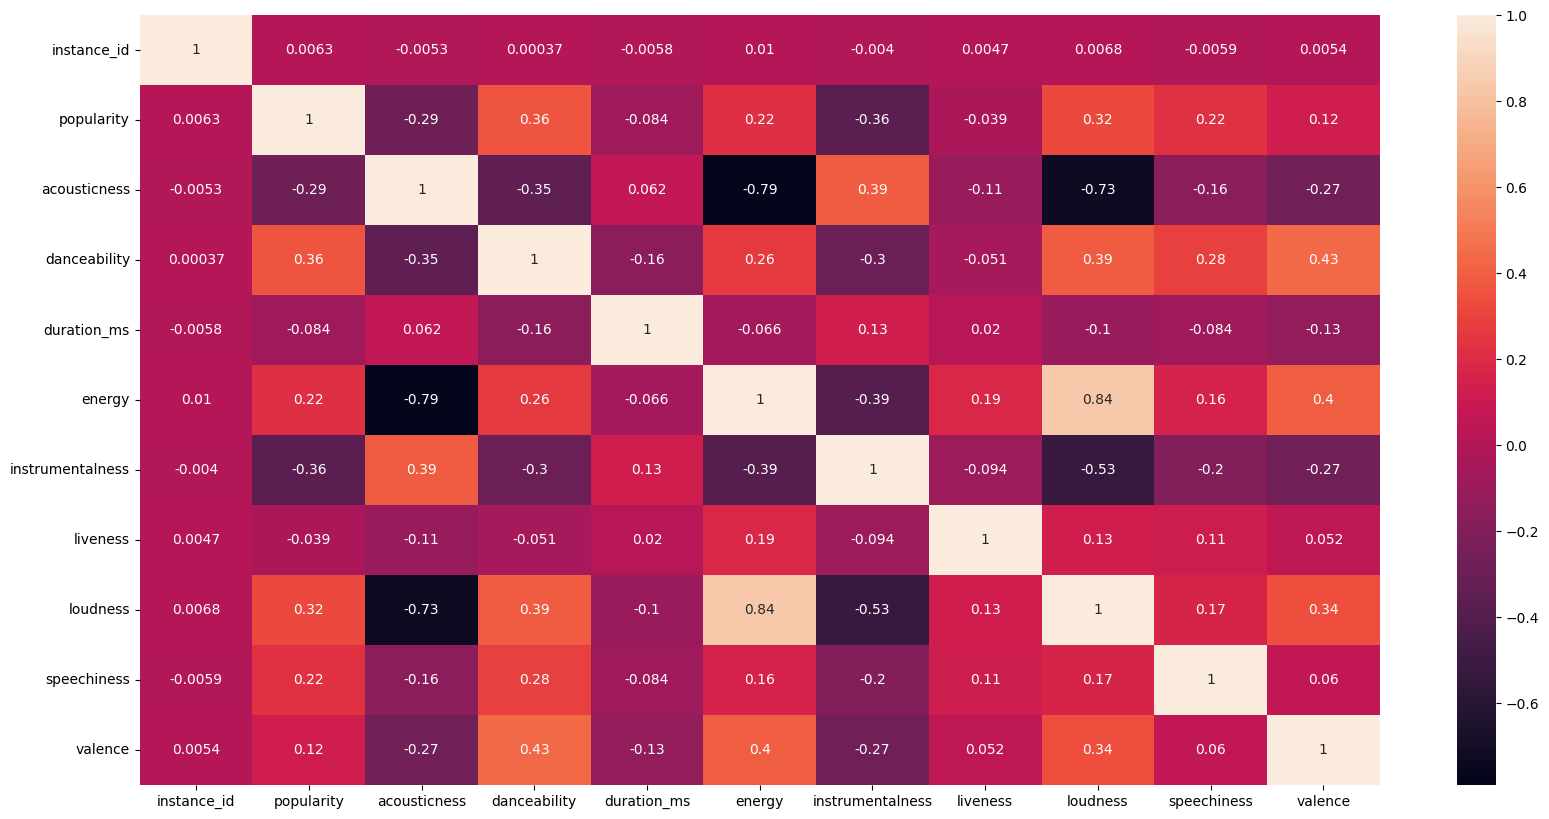

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(popularity_df.corr(), annot=True);

Intento encontrar algo en común en los tracks de mayor popularidad, ordenando desde los más populares

In [18]:
popularity_df.sort_values(by='popularity', ascending=False)

instance_id   artist_name  \
26239      84744.0   Post Malone   
25194      59859.0   Post Malone   
47024      89355.0       J. Cole   
105        49721.0      DJ Snake   
47596      86123.0  Paulo Londra   
...            ...           ...   
10000          NaN           NaN   
10001          NaN           NaN   
10002          NaN           NaN   
10003          NaN           NaN   
10004          NaN           NaN   

                                           track_name  popularity  \
26239                                            Wow.        99.0   
25194   Sunflower - Spider-Man: Into the Spider-Verse        97.0   
47024                                    MIDDLE CHILD        96.0   
105    Taki Taki (with Selena Gomez, Ozuna & Cardi B)        96.0   
47596                                      Adan y Eva        95.0   
...                                               ...         ...   
10000                                             NaN         NaN   
10001                                             NaN         NaN   
10002                                             NaN         NaN   
10003                                             NaN         NaN   
10004                                             NaN         NaN   

       acousticness  danceability  duration_ms  energy  instrumentalness  key  \
26239         0.163         0.833     149520.0   0.539          0.000002    B   
25194         0.556         0.760     158040.0   0.479          0.000000    D   
47024         0.149         0.837     213594.0   0.364          0.000000   G#   
105           0.153         0.841     212500.0   0.798          0.000003   C#   
47596         0.323         0.767     258639.0   0.709          0.000000   C#   
...             ...           ...          ...     ...               ...  ...   
10000           NaN           NaN          NaN     NaN               NaN  NaN   
10001           NaN           NaN          NaN     NaN               NaN  NaN   
10002           NaN           NaN          NaN     NaN               NaN  NaN   
10003           NaN           NaN          NaN     NaN               NaN  NaN   
10004           NaN           NaN          NaN     NaN               NaN  NaN   

       liveness  loudness   mode  speechiness    tempo obtained_date  valence  \
26239    0.1010    -7.399  Minor       0.1780   99.947         4-Apr    0.385   
25194    0.0703    -5.574  Major       0.0466   89.911         4-Apr    0.913   
47024    0.2710   -11.713  Major       0.2760  123.984         4-Apr    0.463   
105      0.0618    -4.206  Minor       0.2290   95.948         4-Apr    0.591   
47596    0.0676    -4.470  Major       0.3360        ?         4-Apr    0.720   
...         ...       ...    ...          ...      ...           ...      ...   
10000       NaN       NaN    NaN          NaN      NaN           NaN      NaN   
10001       NaN       NaN    NaN          NaN      NaN           NaN      NaN   
10002       NaN       NaN    NaN          NaN      NaN           NaN      NaN   
10003       NaN       NaN    NaN          NaN      NaN           NaN      NaN   
10004       NaN       NaN    NaN          NaN      NaN           NaN      NaN   

      music_genre  
26239         Rap  
25194         Rap  
47024     Hip-Hop  
105    Electronic  
47596     Hip-Hop  
...           ...  
10000         NaN  
10001         NaN  
10002         NaN  
10003         NaN  
10004         NaN  

[50005 rows x 18 columns]

In [19]:
#quitamos las filas vacías que tenía el dataset 
popularity_df.dropna(how = 'all', inplace=True)

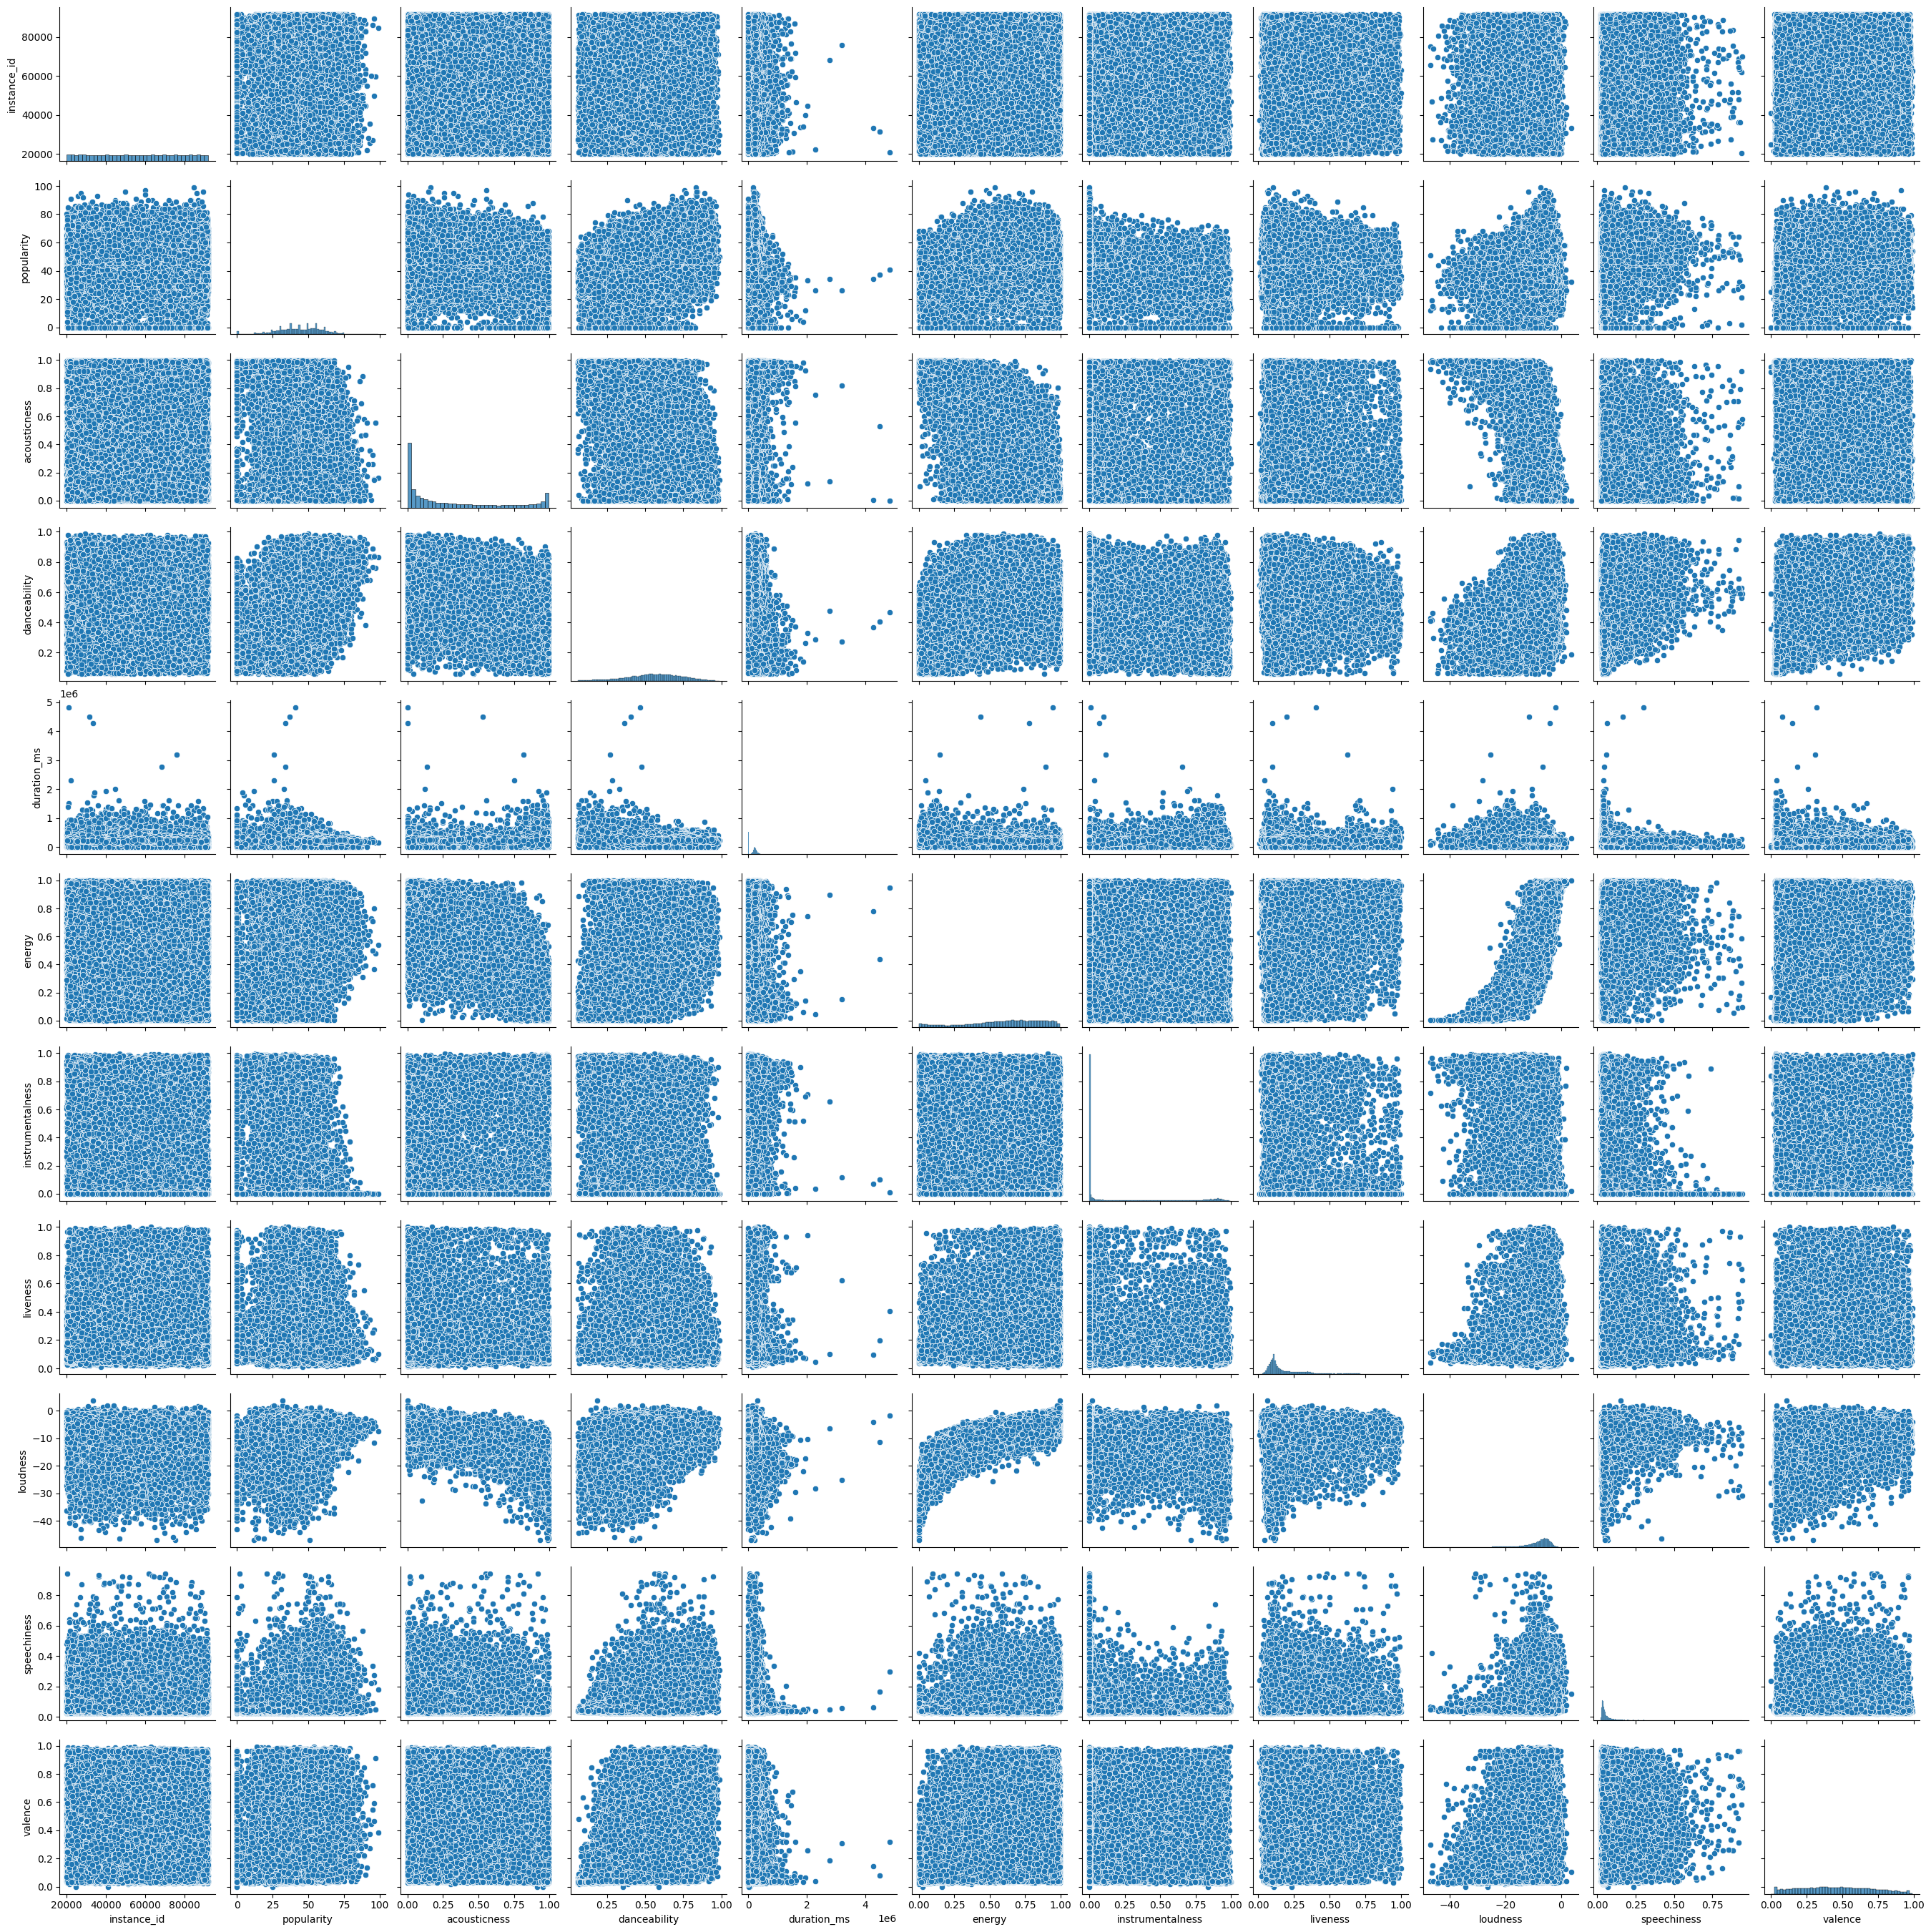

In [20]:
sns.pairplot(popularity_df);

# III. Preprocesamiento de los datos

A continuación cambio las variables object a variables numéricas para ver si encuentro mayor correlación con el target en aquellas aún sin transformar:

        · Feature engineering       

In [21]:
popularity_df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

Observo que las que requieren cambio son *key*, *mode*, y *music genre*, mientras que *obtained date*, por ejemplo, sé que no es relevante.

En primer lugar, le damos un valor numérico a cada uno de los tonos que puede tener una canción en la escala americana:

In [22]:
popularity_df.key.unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

Los ordeno por frecuencia de apariencia, para darle el más alto al que más aparece y el más bajo al que menos y empleo la función ranks para ello. Después lo hago diccionario y sustituyo en la columna pertinente: 

In [23]:
count_key = popularity_df.key.value_counts()

In [24]:
key_dic = count_key.rank(ascending=False, method='dense')

In [25]:
key_dic

G      1.0
C      2.0
C#     3.0
D      4.0
A      5.0
F      6.0
B      7.0
E      8.0
A#     9.0
G#    10.0
F#    11.0
D#    12.0
Name: key, dtype: float64

In [26]:
key_dic = count_key.to_dict()

In [27]:
popularity_df['key'] = popularity_df['key'].replace(key_dic)

A continuación dividimos *Minor* y *Major* de forma binaria para buscar también una posible correlación:

In [28]:
popularity_df['mode'].replace('Minor', 0, inplace=True)
popularity_df['mode'].replace('Major', 1, inplace=True)

Y por último, cambiamos los valores de género por los numéricos, como vemos, hay las mismas muestras de cada género, por lo que podemos asignar cualquier número a cada tipo:

In [29]:
popularity_df.music_genre.value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

In [30]:
popularity_df.music_genre.unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [31]:
popularity_df['music_genre'].replace('Electronic', 1, inplace=True)
popularity_df['music_genre'].replace('Anime', 2, inplace=True)
popularity_df['music_genre'].replace('Jazz', 3, inplace=True)
popularity_df['music_genre'].replace('Alternative', 4, inplace=True)
popularity_df['music_genre'].replace('Country', 5, inplace=True)
popularity_df['music_genre'].replace('Rap', 6, inplace=True)
popularity_df['music_genre'].replace('Blues', 7, inplace=True)
popularity_df['music_genre'].replace('Rock', 8, inplace=True)
popularity_df['music_genre'].replace('Classical', 9, inplace=True)
popularity_df['music_genre'].replace('Hip-Hop', 10, inplace=True)

In [32]:
popularity_df.music_genre.value_counts()

1     5000
2     5000
3     5000
4     5000
5     5000
6     5000
7     5000
8     5000
9     5000
10    5000
Name: music_genre, dtype: int64

In [33]:
popularity_df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness   key  \
0       0.00468         0.652         -1.0   0.941           0.79200  3356   
1       0.01270         0.622     218293.0   0.890           0.95000  5265   
2       0.00306         0.620     215613.0   0.755           0.01180  3319   
3       0.02540         0.774     166875.0   0.700           0.00253  5405   
4       0.00465         0.638     222369.0   0.587           0.90900  3101   

   liveness  loudness  mode  speechiness               tempo obtained_date  \
0     0.115    -5.201     0       0.0748             100.889         4-Apr   
1     0.124    -7.043     0       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617     1       0.0345             127.994         4-Apr   
3     0.157    -4.498     1       0.2390             128.014         4-Apr   
4     0.157    -6.266     1       0.0413             145.036         4-Apr   

   valence  music_genre  
0    0.759            1  
1    0.531            1  
2    0.333            1  
3    0.270            1  
4    0.323            1

In [34]:
popularity_df['tempo'] = popularity_df['tempo'].replace('.', ',')

Compruebo las columnas que siguen siendo object, respecto a las numéricas. Para seguir cambiando los tipos y aumentando mis relaciones con el objetivo a predecir:

In [35]:
popularity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  int64  
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  int64  
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

Pruebo a cambiar el tempo, muchos estudios relacionan la velocidad de una canción con las habitualmente populares

In [36]:
pd.to_numeric(popularity_df.tempo, errors="ignore")

0                   100.889
1        115.00200000000001
2                   127.994
3                   128.014
4                   145.036
                ...        
50000     98.02799999999999
50001    122.04299999999999
50002               131.079
50003     75.88600000000001
50004     99.20100000000001
Name: tempo, Length: 50000, dtype: object

In [37]:
popularity_df.tempo = [(str(i).replace(",", ".")) for i in popularity_df.tempo]

Al probar el cambio a float, me encuentro con unas columnas que están rellenadas con un caracter especial, por lo que lo sustituyo por cero y vuelvo a cambiar la columna a numérico

In [38]:
popularity_df['tempo'][popularity_df['tempo'] == ('?')]

5        ?
32       ?
35       ?
36       ?
39       ?
        ..
49918    ?
49964    ?
49967    ?
49976    ?
49977    ?
Name: tempo, Length: 4980, dtype: object

In [39]:
popularity_df.tempo = [float(str(i).replace("?", '0')) for i in popularity_df.tempo]

In [40]:
popularity_df.tempo = [float(str(i).replace(",", ".")) for i in popularity_df.tempo]

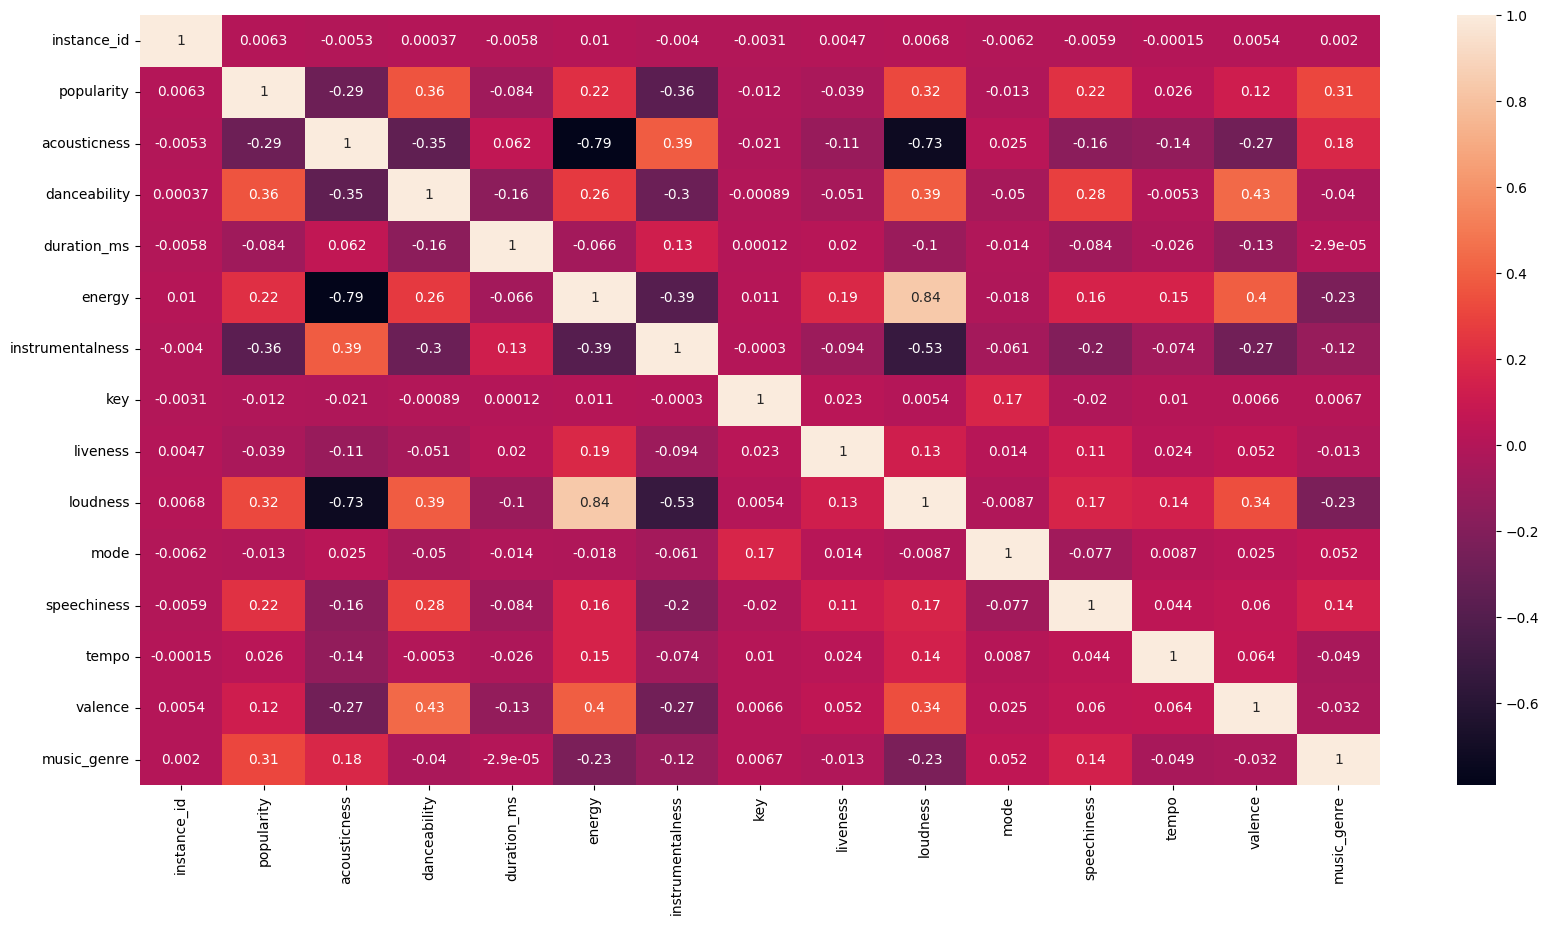

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(popularity_df.corr(), annot=True);

Ahora lo que hacemos es importar pequeños datasets de canciones que han sido populares

In [42]:
tik_tok_songs = pd.read_csv('./data/TikTok_songs_2022.csv')

In [43]:
tik_tok_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

In [44]:
tik_tok_songs.rename(columns={'track_pop' : 'popularity'}, inplace=True)

In [45]:
tik_tok_songs['year'] = 2022

In [46]:
tik_tok_songs.head()

track_name    artist_name  artist_pop  \
0  Running Up That Hill (A Deal With God)      Kate Bush          81   
1                               As It Was   Harry Styles          91   
2                                 Sunroof    Nicky Youre          73   
3                              Heat Waves  Glass Animals          80   
4                         About Damn Time          Lizzo          81   

                        album  popularity  danceability  energy  loudness  \
0              Hounds Of Love          95         0.629   0.547   -13.123   
1                   As It Was          96         0.520   0.731    -5.338   
2                     Sunroof          44         0.768   0.716    -5.110   
3  Dreamland (+ Bonus Levels)          89         0.761   0.525    -6.900   
4             About Damn Time          92         0.836   0.743    -6.305   

   mode  key  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0   10       0.0550        0.7200          0.003140    0.0604    0.197   
1     0    6       0.0557        0.3420          0.001010    0.3110    0.662   
2     1   10       0.0404        0.3500          0.000000    0.1500    0.841   
3     1   11       0.0944        0.4400          0.000007    0.0921    0.531   
4     0   10       0.0656        0.0995          0.000000    0.3350    0.722   

     tempo  time_signature  duration_ms  year  
0  108.375               4       298933  2022  
1  173.930               4       167303  2022  
2  131.430               4       163026  2022  
3   80.870               4       238805  2022  
4  108.966               4       191822  2022

In [47]:
concat_df = pd.concat([popularity_df, tik_tok_songs])

In [48]:
#elimino a continuación las columnas del nuevo dataframe que no tiene la información

Elimino a continuación las columnas del nuevo dataframe que no tiene la información que necesitamos o no aporta mucho a nuestra búsqueda

In [49]:
concat_df.drop(columns=['album', 'obtained_date'], inplace=True)

In [50]:
concat_df

instance_id           artist_name                     track_name  \
0        32894.0              Röyksopp           Röyksopp's Night Out   
1        46652.0  Thievery Corporation               The Shining Path   
2        30097.0        Dillon Francis                      Hurricane   
3        62177.0              Dubloadz                          Nitro   
4        24907.0           What So Not               Divide & Conquer   
..           ...                   ...                            ...   
258          NaN           Tame Impala     The Less I Know The Better   
259          NaN               Ruth B.                     Dandelions   
260          NaN                 Drake  Jimmy Cooks (feat. 21 Savage)   
261          NaN       Suki Waterhouse                   Good Looking   
262          NaN             Sub Urban                        INFERNO   

     popularity  acousticness  danceability  duration_ms  energy  \
0          27.0      0.004680         0.652         -1.0   0.941   
1          31.0      0.012700         0.622     218293.0   0.890   
2          28.0      0.003060         0.620     215613.0   0.755   
3          34.0      0.025400         0.774     166875.0   0.700   
4          32.0      0.004650         0.638     222369.0   0.587   
..          ...           ...           ...          ...     ...   
258        84.0      0.011500         0.640     216320.0   0.740   
259        90.0      0.015700         0.609     233720.0   0.692   
260        92.0      0.000307         0.529     218365.0   0.673   
261        80.0      0.078900         0.377     214800.0   0.558   
262        71.0      0.076600         0.820     133134.0   0.611   

     instrumentalness   key  liveness  loudness  mode  speechiness    tempo  \
0            0.792000  3356    0.1150    -5.201     0       0.0748  100.889   
1            0.950000  5265    0.1240    -7.043     0       0.0300  115.002   
2            0.011800  3319    0.5340    -4.617     1       0.0345  127.994   
3            0.002530  5405    0.1570    -4.498     1       0.2390  128.014   
4            0.909000  3101    0.1570    -6.266     1       0.0413  145.036   
..                ...   ...       ...       ...   ...          ...      ...   
258          0.006780     4    0.1670    -4.083     1       0.0284  116.879   
259          0.000000     1    0.0864    -2.958     1       0.0259  116.959   
260          0.000002     0    0.0930    -4.711     1       0.1750  165.921   
261          0.000342     4    0.1250    -9.076     1       0.0299  149.971   
262          0.000025     9    0.0684    -5.020     0       0.1220  127.883   

     valence  music_genre  artist_pop  time_signature    year  
0      0.759          1.0         NaN             NaN     NaN  
1      0.531          1.0         NaN             NaN     NaN  
2      0.333          1.0         NaN             NaN     NaN  
3      0.270          1.0         NaN             NaN     NaN  
4      0.323          1.0         NaN             NaN     NaN  
..       ...          ...         ...             ...     ...  
258    0.785          NaN        78.0             4.0  2022.0  
259    0.454          NaN        75.0             3.0  2022.0  
260    0.366          NaN        95.0             4.0  2022.0  
261    0.267          NaN        64.0             3.0  2022.0  
262    0.637          NaN        67.0             4.0  2022.0  

[50263 rows x 20 columns]

In [51]:
songs_2021 = pd.read_csv('./data/spotify_top50_2021.csv')

In [52]:
songs_2021['year'] = 2021

In [53]:
songs_2021.drop(columns=['id', 'track_id'], inplace=True)

In [54]:
songs_2021.head()

artist_name                      track_name  popularity  danceability  \
0  Olivia Rodrigo                 drivers license          92         0.561   
1       Lil Nas X  MONTERO (Call Me By Your Name)          90         0.593   
2   The Kid LAROI       STAY (with Justin Bieber)          92         0.591   
3  Olivia Rodrigo                        good 4 u          95         0.563   
4        Dua Lipa       Levitating (feat. DaBaby)          89         0.702   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.431   10    -8.810     1       0.0578       0.76800          0.000014   
1   0.503    8    -6.725     0       0.2200       0.29300          0.000000   
2   0.764    1    -5.484     1       0.0483       0.03830          0.000000   
3   0.664    9    -5.044     1       0.1540       0.33500          0.000000   
4   0.825    6    -3.787     0       0.0601       0.00883          0.000000   

   liveness  valence    tempo  duration_ms  time_signature  year  
0    0.1060    0.137  143.875       242013               4  2021  
1    0.4050    0.710  178.781       137704               4  2021  
2    0.1030    0.478  169.928       141806               4  2021  
3    0.0849    0.688  166.928       178147               4  2021  
4    0.0674    0.915  102.977       203064               4  2021

In [55]:
pop_tracks = pd.concat([concat_df, songs_2021])

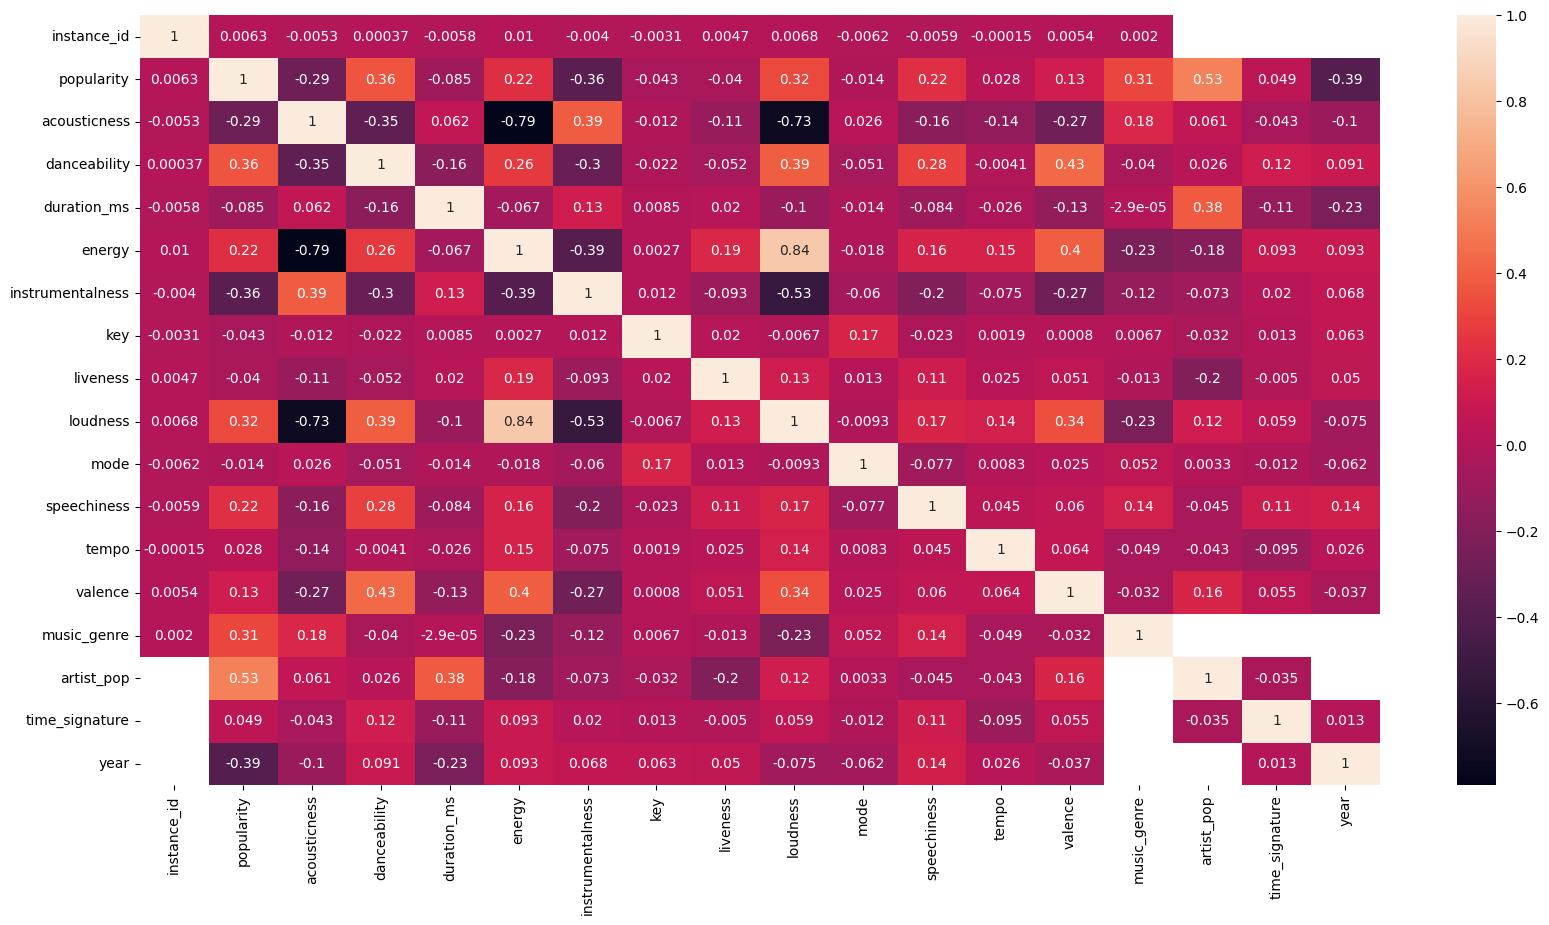

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(pop_tracks.corr(), annot=True);

In [57]:
df_reduc = pd.concat([tik_tok_songs, songs_2021])

In [58]:
df_reduc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 49
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        313 non-null    object 
 1   artist_name       313 non-null    object 
 2   artist_pop        263 non-null    float64
 3   album             263 non-null    object 
 4   popularity        313 non-null    int64  
 5   danceability      313 non-null    float64
 6   energy            313 non-null    float64
 7   loudness          313 non-null    float64
 8   mode              313 non-null    int64  
 9   key               313 non-null    int64  
 10  speechiness       313 non-null    float64
 11  acousticness      313 non-null    float64
 12  instrumentalness  313 non-null    float64
 13  liveness          313 non-null    float64
 14  valence           313 non-null    float64
 15  tempo             313 non-null    float64
 16  time_signature    313 non-null    int64  
 17

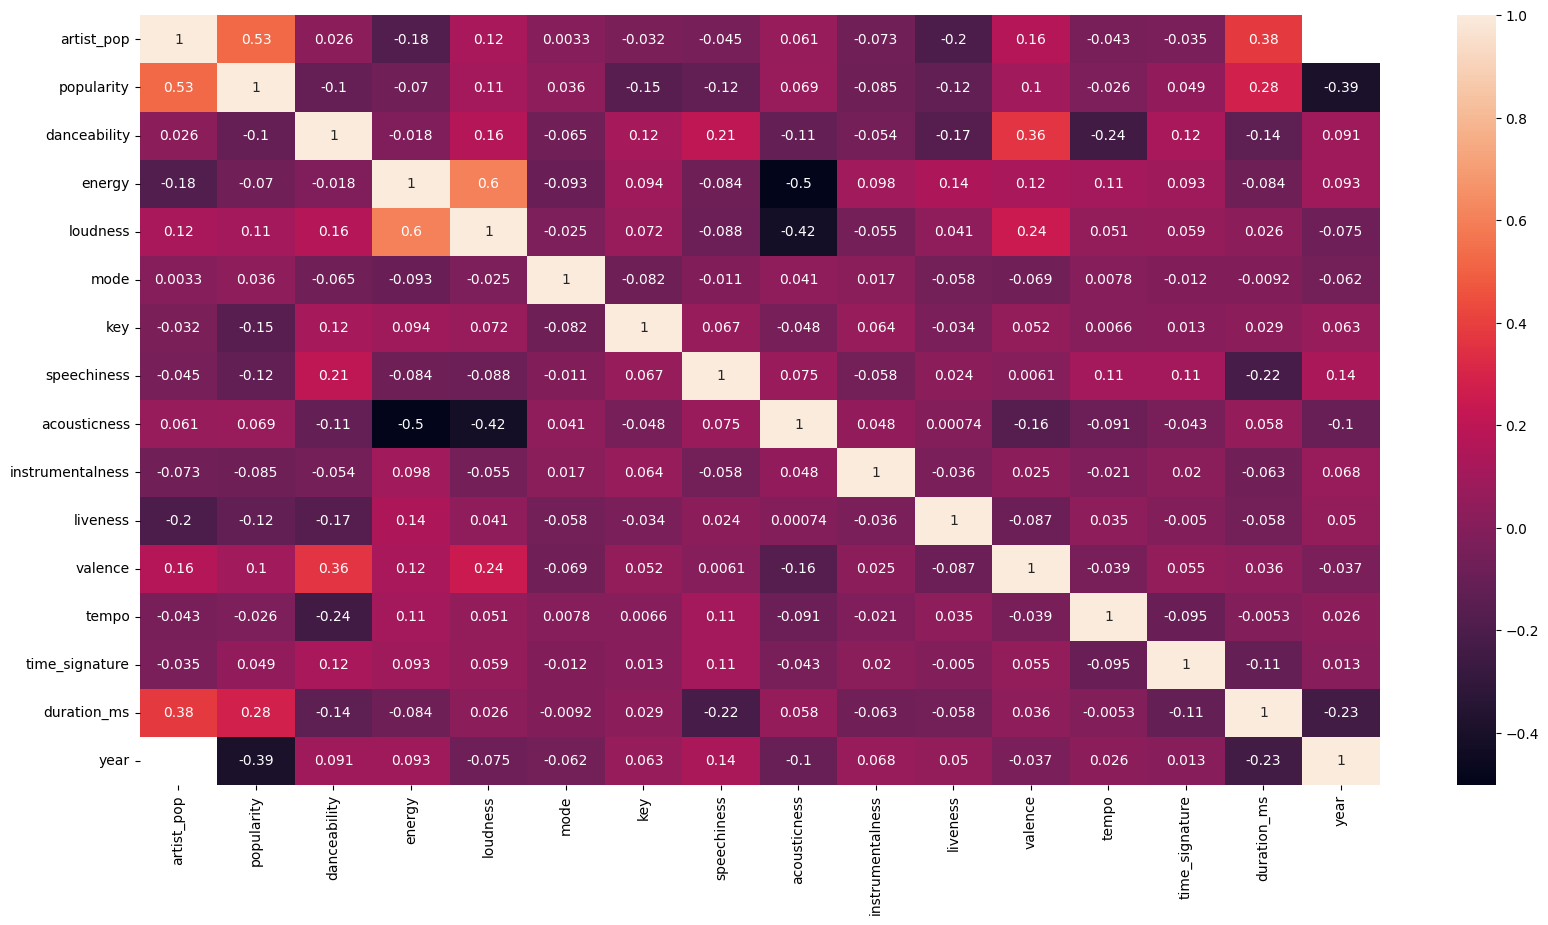

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(df_reduc.corr(), annot=True);

Observo los nombres de las columnas, que refieren a mi inicial dataset con diferentes instancias, pero con un nombre de columna distinto al original, así que los cambio

In [60]:
top_10_years = pd.read_csv('./data/top10s.csv', encoding='latin1')

In [61]:
top_10_years.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [62]:
tik_tok_songs.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'popularity',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms', 'year'],
      dtype='object')

In [63]:
top_10_years.rename(columns={'title': 'track_name', 'artist': 'artist_name', 'top genre':'music_genre', 'bpm': 'tempo', 'nrgy': 'energy',
       'dnce': 'danceability', 'dB': 'loudness', 'live': 'liveness', 'val': 'valence', 'dur': 'duration_ms', 'acous': 'acousticness',
         'spch': 'speechiness', 'pop': 'popularity'}, inplace=True)

In [64]:
top_10_years.head()

Unnamed: 0            track_name artist_name      music_genre  year  tempo  \
0           1      Hey, Soul Sister       Train       neo mellow  2010     97   
1           2  Love The Way You Lie      Eminem  detroit hip hop  2010     87   
2           3               TiK ToK       Kesha        dance pop  2010    120   
3           4           Bad Romance   Lady Gaga        dance pop  2010    119   
4           5  Just the Way You Are  Bruno Mars              pop  2010    109   

   energy  danceability  loudness  liveness  valence  duration_ms  \
0      89            67        -4         8       80          217   
1      93            75        -5        52       64          263   
2      84            76        -3        29       71          200   
3      92            70        -4         8       71          295   
4      84            64        -5         9       43          221   

   acousticness  speechiness  popularity  
0            19            4          83  
1            24           23          82  
2            10           14          80  
3             0            4          79  
4             2            4          78

In [65]:
top_10_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    603 non-null    int64 
 1   track_name    603 non-null    object
 2   artist_name   603 non-null    object
 3   music_genre   603 non-null    object
 4   year          603 non-null    int64 
 5   tempo         603 non-null    int64 
 6   energy        603 non-null    int64 
 7   danceability  603 non-null    int64 
 8   loudness      603 non-null    int64 
 9   liveness      603 non-null    int64 
 10  valence       603 non-null    int64 
 11  duration_ms   603 non-null    int64 
 12  acousticness  603 non-null    int64 
 13  speechiness   603 non-null    int64 
 14  popularity    603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [66]:
top_10_years['music_genre'].unique()

array(['neo mellow', 'detroit hip hop', 'dance pop', 'pop',
       'canadian pop', 'hip pop', 'barbadian pop', 'atl hip hop',
       'australian pop', 'indie pop', 'art pop', 'colombian pop',
       'big room', 'british soul', 'chicago rap', 'acoustic pop',
       'permanent wave', 'boy band', 'baroque pop', 'celtic rock',
       'electro', 'complextro', 'canadian hip hop', 'candy pop',
       'alaska indie', 'folk-pop', 'metropopolis', 'house',
       'australian hip hop', 'electropop', 'australian dance',
       'hollywood', 'canadian contemporary r&b',
       'irish singer-songwriter', 'tropical house', 'belgian edm',
       'french indie pop', 'hip hop', 'danish pop', 'latin',
       'canadian latin', 'electronic trap', 'edm', 'electro house',
       'downtempo', 'brostep', 'contemporary country', 'moroccan pop',
       'escape room', 'alternative r&b'], dtype=object)

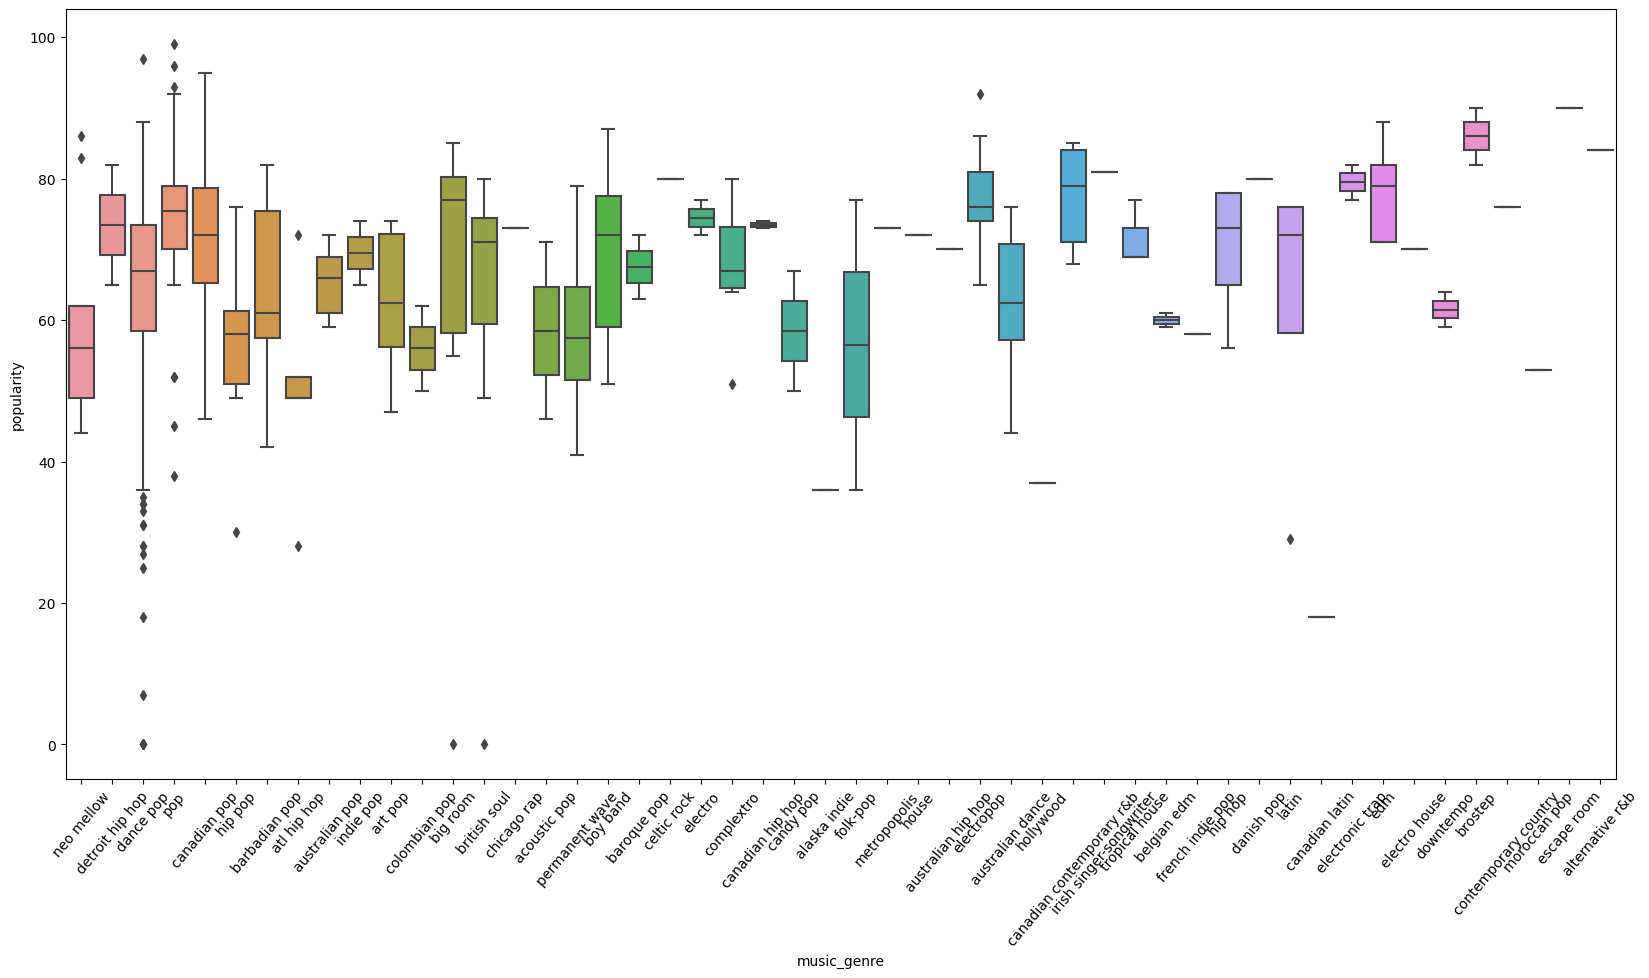

In [67]:
plt.figure(figsize=(20,10))
plt.xticks(rotation= 50)
sns.boxplot(x = top_10_years['music_genre'], y = top_10_years['popularity'])
plt.savefig('boxplot_music_genre');

In [68]:
genre_dic = dict(zip(top_10_years['music_genre'].unique(), range(len(top_10_years['music_genre'].unique()))))

In [69]:
top_10_years['music_genre'] = top_10_years['music_genre'].replace(genre_dic)

In [70]:
top_10_years['music_genre']

0       0
1       1
2       2
3       2
4       3
       ..
598     2
599     3
600     2
601     2
602    29
Name: music_genre, Length: 603, dtype: int64

Así quedaría nuestro dataset para probar modelos, más pequeño

In [71]:
df_reduc_2 = pd.concat([df_reduc, top_10_years])

In [72]:
df_reduc_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 602
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        916 non-null    object 
 1   artist_name       916 non-null    object 
 2   artist_pop        263 non-null    float64
 3   album             263 non-null    object 
 4   popularity        916 non-null    int64  
 5   danceability      916 non-null    float64
 6   energy            916 non-null    float64
 7   loudness          916 non-null    float64
 8   mode              313 non-null    float64
 9   key               313 non-null    float64
 10  speechiness       916 non-null    float64
 11  acousticness      916 non-null    float64
 12  instrumentalness  313 non-null    float64
 13  liveness          916 non-null    float64
 14  valence           916 non-null    float64
 15  tempo             916 non-null    float64
 16  time_signature    313 non-null    float64
 1

Ahora voy a recortar el dataset inicial de 50000 filas para reducir la cantidad de muestras y que pueda entrenar bien mi modelo sin largas duraciones

Primero escojo muestras que tengan alta popularidad, para que entienda las referencias y las similitudes en las canciones populares

In [73]:
pop_mas_75 = popularity_df[popularity_df['popularity'] > 70]

In [74]:
pop_mas_75.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592 entries, 105 to 50001
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       1592 non-null   float64
 1   artist_name       1592 non-null   object 
 2   track_name        1592 non-null   object 
 3   popularity        1592 non-null   float64
 4   acousticness      1592 non-null   float64
 5   danceability      1592 non-null   float64
 6   duration_ms       1592 non-null   float64
 7   energy            1592 non-null   float64
 8   instrumentalness  1592 non-null   float64
 9   key               1592 non-null   int64  
 10  liveness          1592 non-null   float64
 11  loudness          1592 non-null   float64
 12  mode              1592 non-null   int64  
 13  speechiness       1592 non-null   float64
 14  tempo             1592 non-null   float64
 15  obtained_date     1592 non-null   object 
 16  valence           1592 non-null   float

Ahora selecciono con otro filtro el otro extremo, las casi apenas populares

In [75]:
pop_menos_10 = popularity_df[popularity_df['popularity'] < 10]

In [76]:
pop_medio = popularity_df[(popularity_df['popularity'] > 48) & (popularity_df['popularity'] < 50)]

In [77]:
pop_medio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 50 to 49926
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       1169 non-null   float64
 1   artist_name       1169 non-null   object 
 2   track_name        1169 non-null   object 
 3   popularity        1169 non-null   float64
 4   acousticness      1169 non-null   float64
 5   danceability      1169 non-null   float64
 6   duration_ms       1169 non-null   float64
 7   energy            1169 non-null   float64
 8   instrumentalness  1169 non-null   float64
 9   key               1169 non-null   int64  
 10  liveness          1169 non-null   float64
 11  loudness          1169 non-null   float64
 12  mode              1169 non-null   int64  
 13  speechiness       1169 non-null   float64
 14  tempo             1169 non-null   float64
 15  obtained_date     1169 non-null   object 
 16  valence           1169 non-null   float6

In [78]:
final_df = pd.concat([df_reduc_2, pop_mas_75, pop_menos_10, pop_medio])

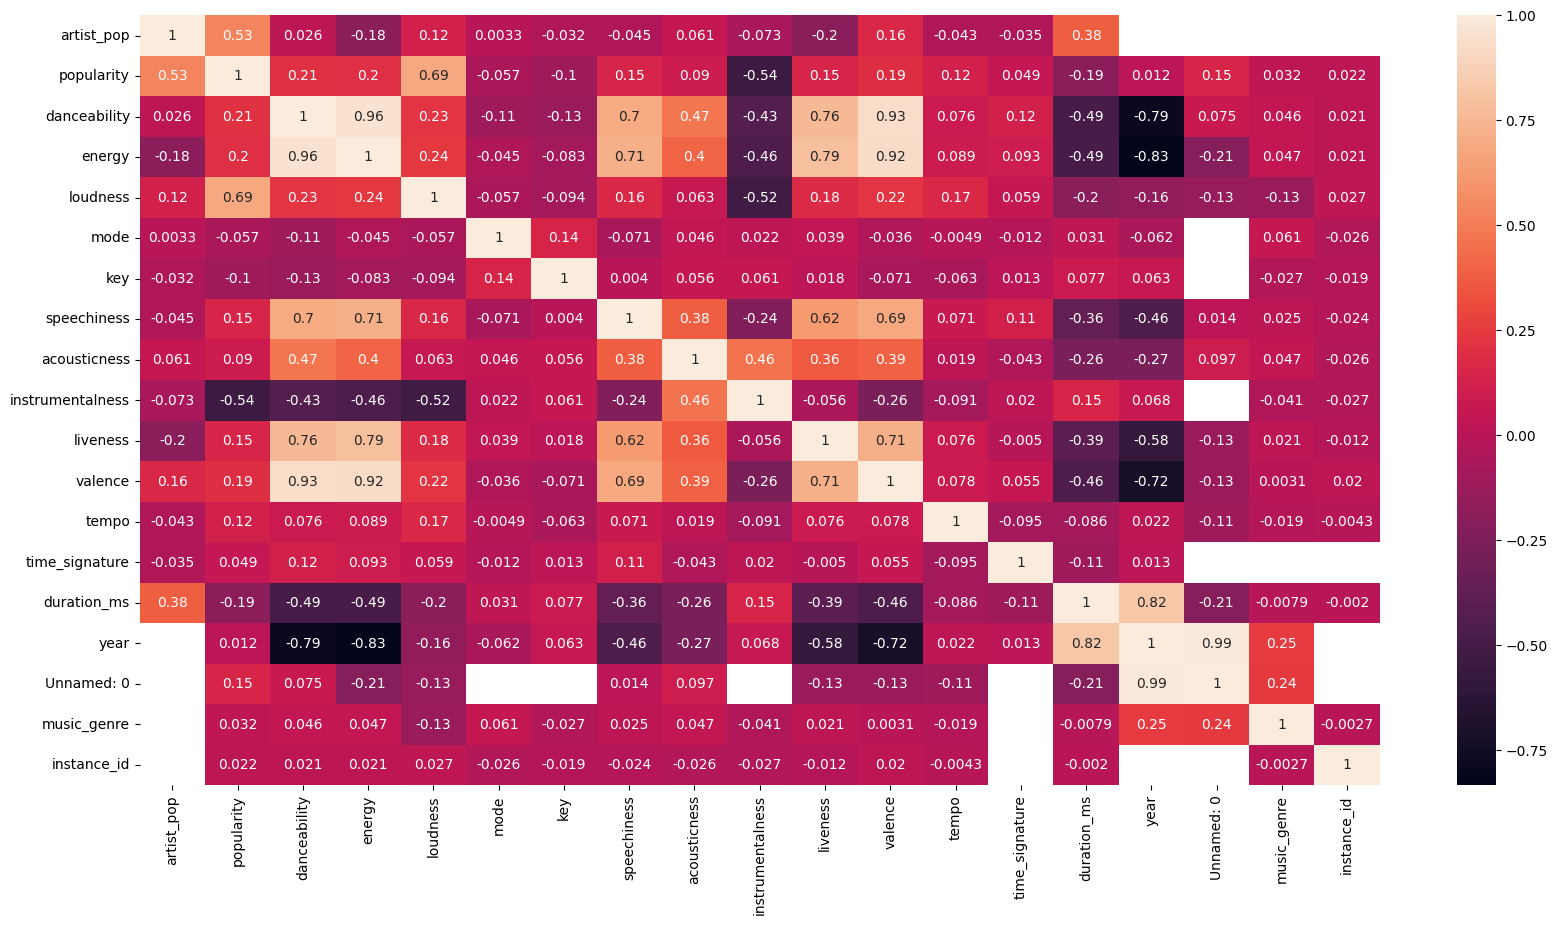

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(), annot=True);


Observo que al quitar ruido han mejorado algunas correlaciones notablemente, ahora quito las columnas que sobran porque no tienen impacto

In [80]:
final_df.drop(columns=['Unnamed: 0', 'instance_id'], inplace=True)

In [81]:
final_df.reset_index(drop=True, inplace=True)

In [82]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        4702 non-null   object 
 1   artist_name       4702 non-null   object 
 2   artist_pop        263 non-null    float64
 3   album             263 non-null    object 
 4   popularity        4702 non-null   float64
 5   danceability      4702 non-null   float64
 6   energy            4702 non-null   float64
 7   loudness          4702 non-null   float64
 8   mode              4099 non-null   float64
 9   key               4099 non-null   float64
 10  speechiness       4702 non-null   float64
 11  acousticness      4702 non-null   float64
 12  instrumentalness  4099 non-null   float64
 13  liveness          4702 non-null   float64
 14  valence           4702 non-null   float64
 15  tempo             4702 non-null   float64
 16  time_signature    313 non-null    float64


In [83]:
final_df['artist_pop'].fillna(method= 'ffill', inplace=True)

In [84]:
final_df.head()

track_name    artist_name  artist_pop  \
0  Running Up That Hill (A Deal With God)      Kate Bush        81.0   
1                               As It Was   Harry Styles        91.0   
2                                 Sunroof    Nicky Youre        73.0   
3                              Heat Waves  Glass Animals        80.0   
4                         About Damn Time          Lizzo        81.0   

                        album  popularity  danceability  energy  loudness  \
0              Hounds Of Love        95.0         0.629   0.547   -13.123   
1                   As It Was        96.0         0.520   0.731    -5.338   
2                     Sunroof        44.0         0.768   0.716    -5.110   
3  Dreamland (+ Bonus Levels)        89.0         0.761   0.525    -6.900   
4             About Damn Time        92.0         0.836   0.743    -6.305   

   mode   key  ...  acousticness  instrumentalness  liveness  valence  \
0   0.0  10.0  ...        0.7200          0.003140    0.0604    0.197   
1   0.0   6.0  ...        0.3420          0.001010    0.3110    0.662   
2   1.0  10.0  ...        0.3500          0.000000    0.1500    0.841   
3   1.0  11.0  ...        0.4400          0.000007    0.0921    0.531   
4   0.0  10.0  ...        0.0995          0.000000    0.3350    0.722   

     tempo  time_signature  duration_ms    year  music_genre  obtained_date  
0  108.375             4.0     298933.0  2022.0          NaN            NaN  
1  173.930             4.0     167303.0  2022.0          NaN            NaN  
2  131.430             4.0     163026.0  2022.0          NaN            NaN  
3   80.870             4.0     238805.0  2022.0          NaN            NaN  
4  108.966             4.0     191822.0  2022.0          NaN            NaN  

[5 rows x 21 columns]

Voy a probar una última variable y es si algunas palabras de los títulos de las canciones más populares intervienen a la hora de hacer una canción más famosa o no. Para ello, primero hago un split de los títulos y a continuación los añado a una lista *word freq*, que conformarán una nueva columna *track words* : 

In [85]:
final_df["track_words"] = final_df["track_name"].str.split()

In [86]:
word_freq = {}
for words in final_df["track_words"]:
    for word in words:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

In [87]:
final_df['track_words']

0       [Running, Up, That, Hill, (A, Deal, With, God)]
1                                         [As, It, Was]
2                                             [Sunroof]
3                                         [Heat, Waves]
4                                   [About, Damn, Time]
                             ...                       
4697                                    [Life, Lessons]
4698                                           [Drogas]
4699                                            [Mural]
4700                                           [Bailan]
4701                                            [Kills]
Name: track_words, Length: 4702, dtype: object

Ahora, separo con dos variables el dataframe entre populares y no populares y las separo en listas diferentes para finalmente hacer el conteo de ambas y recoger la frecuencia total:


In [88]:
popular_songs = final_df[final_df['popularity'] >= 50]
less_popular_songs = final_df[final_df['popularity'] < 50]

In [89]:
popular_counts = {word: 0 for word in word_freq}
for title_words in final_df['track_words']:
    for word in title_words:
        if word in popular_counts:
            popular_counts[word] += 1


In [90]:
less_popular_counts = {word: 0 for word in word_freq}
for title_words in less_popular_songs['track_words']:
    for word in title_words:
        if word in less_popular_counts:
            less_popular_counts[word] += 1

In [91]:
for word in word_freq:
    popular_freq = popular_counts[word] / len(popular_songs)
    less_popular_freq = less_popular_counts[word] / len(less_popular_songs)
    print(f'Palabra: {word}\nFrecuencia en canciones populares: {popular_freq:.2f}\nFrecuencia en canciones menos populares: {less_popular_freq:.2f}\n')

Palabra: Running
Frecuencia en canciones populares: 0.00
Frecuencia en canciones menos populares: 0.00

Palabra: Up
Frecuencia en canciones populares: 0.03
Frecuencia en canciones menos populares: 0.01

Palabra: That
Frecuencia en canciones populares: 0.01
Frecuencia en canciones menos populares: 0.00

Palabra: Hill
Frecuencia en canciones populares: 0.00
Frecuencia en canciones menos populares: 0.00

Palabra: (A
Frecuencia en canciones populares: 0.00
Frecuencia en canciones menos populares: 0.00

Palabra: Deal
Frecuencia en canciones populares: 0.00
Frecuencia en canciones menos populares: 0.00

Palabra: With
Frecuencia en canciones populares: 0.01
Frecuencia en canciones menos populares: 0.00

Palabra: God)
Frecuencia en canciones populares: 0.00
Frecuencia en canciones menos populares: 0.00

Palabra: As
Frecuencia en canciones populares: 0.00
Frecuencia en canciones menos populares: 0.00

Palabra: It
Frecuencia en canciones populares: 0.05
Frecuencia en canciones menos populares: 0

Como veo que no hace mucha diferencia, empiezo a eliminar columnas inservibles. Si vuelvo a sacar nuestro mapa de calor, veo que una de las variables que tiene puntuación más baja con respecto al target es la escala (Minor/Major). Además de la firma de tiempo, por ejemplo. Son columnas que, además, cualquiera podría pensar que no tienen una relación directa con la popularidad de una canción. Por ello, las eliminamos:-


In [92]:
final_df['year'].fillna(method= 'ffill', inplace=True)

In [93]:
final_df.drop(columns=['time_signature', 'mode', 'album', 'track_words'], inplace=True)

In [94]:
final_df.drop(columns=['year', 'key', 'artist_pop'], inplace=True)

In [95]:
final_df.drop(columns=['music_genre', 'obtained_date'], inplace=True)

Como última medida para aumentar la correlación entre las variables y poder predecir de una forma menos costosa computacionalmente, me decanto por pasar de un problema de regresión a uno de clasificación. En lugar de recurrir a predecir la popularidad de la canción en dígitos concretos, vamos a tratarlo como un problema de clasificación para afinar aún más la puntería. Por lo tanto, de esta forma, recurro a cambiar la popularidad a un término binario, siendo 1.0 la mayor popularidad posible (valores por encima de 50) y 0.0, la menor popularidad (valores por debajo de 50, NO populares) 

    ¿Será esta canción o no popular en función del resto de sus atributos? Para abordar la problemática de esta forma, tenemos que convertir a binario los dígitos)

In [96]:
model_clf = final_df

In [97]:
model_clf['popularity'] = pd.qcut(model_clf['popularity'], q=2, labels=False)

In [98]:
popularity_dict = {0: 0, 1: 1}
model_clf['popularity_'] = model_clf['popularity'].apply(lambda x: popularity_dict[x])

In [115]:
model_clf.drop(columns=['track_name', 'artist_name', 'popularity'], inplace=True)

Por último comparo ambos mapas de calor y verifico que me da mejores cifras la prueba de popularidad en binario, que afrontar el problema de la predicción como regresivo

## IV Modelado

Entrenamiento del modelo

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
Y = model_clf.loc[:,'popularity']
X = model_clf.drop(columns=['popularity', 'popularity_', 'track_name', 'artist_name'])

In [101]:
X

danceability  energy  loudness  speechiness  acousticness  \
0            0.629   0.547   -13.123       0.0550        0.7200   
1            0.520   0.731    -5.338       0.0557        0.3420   
2            0.768   0.716    -5.110       0.0404        0.3500   
3            0.761   0.525    -6.900       0.0944        0.4400   
4            0.836   0.743    -6.305       0.0656        0.0995   
...            ...     ...       ...          ...           ...   
4697         0.888   0.746    -6.101       0.2860        0.1530   
4698         0.642   0.710    -6.247       0.0347        0.0979   
4699         0.431   0.898    -4.233       0.1660        0.0110   
4700         0.672   0.738    -3.987       0.0872        0.5280   
4701         0.685   0.708    -7.077       0.0445        0.0187   

      instrumentalness  liveness  valence    tempo  duration_ms  
0             0.003140    0.0604    0.197  108.375     298933.0  
1             0.001010    0.3110    0.662  173.930     167303.0  
2             0.000000    0.1500    0.841  131.430     163026.0  
3             0.000007    0.0921    0.531   80.870     238805.0  
4             0.000000    0.3350    0.722  108.966     191822.0  
...                ...       ...      ...      ...          ...  
4697          0.000065    0.0490    0.646  100.920         -1.0  
4698          0.000042    0.0806    0.761  146.074     136526.0  
4699          0.001150    0.5230    0.192    0.000     528880.0  
4700          0.001300    0.1070    0.546  176.081     230989.0  
4701          0.005290    0.1000    0.322  150.006     169600.0  

[4702 rows x 10 columns]

In [102]:
import numpy as np

In [103]:
X.replace(np.NaN, 0, inplace=True)

Primero dividiré mi data final en train y test para sacar los .csv para más tarde aplicarlos a mi modelo final:

In [116]:
train_data, test_data = train_test_split(model_clf, test_size=0.2, random_state=42)

# Guarda los conjuntos de datos en diferentes archivos CSV
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

Y a continuación divido X e Y en train y test para mis pruebas:

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42)

Revisamos que está correctamente realizada la división entre train/test y guardamos la extracción en un .csv

In [106]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", Y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", Y_test.shape)

Total features shape: (4702, 10)
Train features shape: (3761, 10)
Train target shape: (3761,)
Test features shape: (941, 10)
Test target shape: (941,)


Importamos las librerías que vamos a utilizar, emplearemos un pipeline con modelos de clasificación para buscar los que más se acerquen a los resultados que quiero

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

Observo que mi target está bastante balanceado, sin extremos de uno ni de otro 

In [109]:
Y.value_counts()

0    2359
1    2343
Name: popularity, dtype: int64

Antes de comenzar con la prueba de modelos, realizaremos un escalado de mis features, para ver qué me otorga mejores resultados

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

#### I. Pipeline

Emplearemos uso de un *Pipeline* para probar algunos modelos iniciales de clasificación y una vez que nos dé unos resultados determinados, probaremos otros parámetros para ajustar mejor el modelo y conseguir la mejor precisión posible.

In [118]:
pipe = Pipeline(steps=[
    ('classifier', RandomForestClassifier())
])

logistic_params = {
    'classifier': [LogisticRegression(max_iter=1000, solver='saga')],
    'classifier__penalty': ['l1', 'l2']
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators' : [100, 150, 200],
    'classifier__max_depth': [2,3,4,5],
    'classifier__max_features': [1,2,3]
}

svm_param = {
    'classifier': [SVC()],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
    'classifier__kernel' : ['sigmoid']
}

decision_tree_param = {
    'classifier': [DecisionTreeClassifier()],
    'classifier__max_depth': [2, 3, 4, 5],
    'classifier__min_samples_split': [2,4,6,8,10]

}
search_space = [
    logistic_params,
    random_forest_params,
    svm_param, decision_tree_param
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10)

clf.fit(X_train, Y_train)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarn

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000,
                                                            solver='saga')],
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [RandomForestClassifier(max_depth=5,
                                                                max_features=3)],
                          'classifier__max_depth': [2, 3, 4, 5],
                          'classifier__max_features': [1, 2, 3],
                          'classifier__n_estimators': [100, 150, 200]},
                         {'classifier': [SVC()],
                          'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
                          'classifier__kernel': ['sigmoid']},
                         {'classifier': [DecisionTreeClassifier()],
                        

In [119]:
print(clf.best_estimator_)
print('\n')
print(clf.best_params_)
print('\n')
print(clf.best_score_)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=5, max_features=3))])


{'classifier': RandomForestClassifier(max_depth=5, max_features=3), 'classifier__max_depth': 5, 'classifier__max_features': 3, 'classifier__n_estimators': 100}


0.7476734014334895


Sacando el mejor resultado de mi pipeline, obtenemos como mejor resultado un **Random Forest Classifier**, con los parámetros que hemos probado, pero un accuracy mejorable. Ahora probaremos con otros diferentes:

In [120]:
pipe = Pipeline(steps=[
    ('classifier', RandomForestClassifier())
])

logistic_params = {
    'classifier': [LogisticRegression(max_iter=1000, solver='saga')],
    'classifier__penalty': ['l1', 'l2']
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators' : [100, 150, 200],
    'classifier__max_depth': [2,3,4,5],
    'classifier__max_features': [1,2,3]
}

svm_param = {
    'classifier': [SVC()],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
    'classifier__kernel' : ['sigmoid']
}

decision_tree_param = {
    'classifier': [DecisionTreeClassifier()],
    'classifier__max_depth': [2, 3, 4, 5],
    'classifier__min_samples_split': [2,4,6,8,10]

}
search_space = [
    logistic_params,
    random_forest_params,
    svm_param, decision_tree_param
]

clf_scal = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10)

clf_scal.fit(X_train_scal, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000,
                                                            solver='saga')],
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [RandomForestClassifier(max_depth=5,
                                                                max_features=2)],
                          'classifier__max_depth': [2, 3, 4, 5],
                          'classifier__max_features': [1, 2, 3],
                          'classifier__n_estimators': [100, 150, 200]},
                         {'classifier': [SVC()],
                          'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
                          'classifier__kernel': ['sigmoid']},
                         {'classifier': [DecisionTreeClassifier()],
                        

In [121]:
print(clf_scal.best_estimator_)
print('\n')
print(clf_scal.best_params_)
print('\n')
print(clf_scal.best_score_)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=5, max_features=2))])


{'classifier': RandomForestClassifier(max_depth=5, max_features=2), 'classifier__max_depth': 5, 'classifier__max_features': 2, 'classifier__n_estimators': 100}


0.748471273773915


En principio observamos que da un score ligeramente más bajo con los datos escalados, seguimos probando formas

#### II. Voting Classifier

In [122]:
from sklearn.ensemble import VotingClassifier

    En primer lugar, probaremos un hard voting classifier, para analizar la precisión de las predicciones de los clasificadores y no las probabilidades como tal

In [123]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=200, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]

voting_clf = VotingClassifier(estimators=estimators, voting='hard')

In [124]:
voting_clf.fit(X_train, Y_train)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('svc', SVC(random_state=42))])

In [125]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression 0.665249734325186
RandomForestClassifier 0.7874601487778958
SVC 0.6354941551540914


C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier 0.740701381509033


    Ahora analizaremos más las probabilidades que los votos o predicciones con un soft voting classifier

In [126]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42) 

estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]

soft_voting_clf = VotingClassifier(estimators=estimators, voting='soft')

In [127]:
soft_voting_clf.fit(X_train, Y_train)

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [128]:
for clf in (log_clf, rnd_clf, svm_clf, soft_voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression 0.665249734325186
RandomForestClassifier 0.7906482465462275
SVC 0.6354941551540914


C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier 0.769394261424017


Nuestra mejor opción sigue siendo Random Forest, con una puntuación de casi diez puntos por encima del resto de modelos, vamos a centrarnos en él y a mejorarlo

#### III. Random Forest Classifier

Utilizaremos un *Grid Search* que nos ayude a encontrar los mejores parámetros para nuestro modelo:

In [129]:
parameters = {
    'n_estimators' : [100, 125, 150, 175],
    'max_depth': [8, 10, 16, 20],
    'min_samples_split' : [2,5,10],
}

rnd_clf = RandomForestClassifier()

clf = GridSearchCV(estimator = rnd_clf,
                  param_grid = parameters,
                  cv = 10,
                  scoring="accuracy")

clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 16, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 125, 150, 175]},
             scoring='accuracy')

In [130]:
clf.best_estimator_

RandomForestClassifier(max_depth=16, min_samples_split=5)

In [131]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 16, 'min_samples_split': 5, 'n_estimators': 100}
0.7678777019019132


Como me ha sacado como mejor profundidad la cifra más alta que coloqué, vuelvo a sacar un *Grid Search* pero sólo probando nuevas profundidas máximas

In [132]:
parameters = {
    'max_depth' : [20,25,30]
}

rnd_clf = RandomForestClassifier()

clf = GridSearchCV(estimator = rnd_clf,
                  param_grid = parameters,
                  cv = 10,
                  scoring="accuracy")

clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 25, 30]}, scoring='accuracy')

In [133]:
print(clf.best_params_)

{'max_depth': 25}


Veo que mi mejor salida de profundidad es 25, vuelvo a entrenar mi modelo Random Forest

In [134]:
best_rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42,
                                      max_depth=25, min_samples_split=2, criterion='gini')
best_rnd_clf.fit(X_train, Y_train)

y_pred_rf = best_rnd_clf.predict(X_test)

print('Accuracy ' , accuracy_score(Y_test, y_pred_rf))
print('\n')
print('F1 Score ' ,f1_score(Y_test, y_pred_rf))
print('\n')
print('ROC AUC Score ' ,roc_auc_score(Y_test, y_pred_rf))
print('\n')

Accuracy  0.7927736450584485


F1 Score  0.8024316109422492


ROC AUC Score  0.7926258537819377




In [135]:
prediccion_rndclf_train = best_rnd_clf.predict(X_train)
prediccion_rndclf_test = best_rnd_clf.predict(X_test)

In [136]:
print('Training score')
print('\n')
print('Accuracy:', accuracy_score(Y_train, prediccion_rndclf_train))
print('F1:', f1_score(Y_train, prediccion_rndclf_train))
print('Precision:', precision_score(Y_train, prediccion_rndclf_train))
print('Recall:', recall_score(Y_train, prediccion_rndclf_train))
print('\n')
print('-'*100)
print('\n')
print('Test score')
print('\n')
print('Accuracy:', accuracy_score(Y_test, prediccion_rndclf_test))
print('F1:', f1_score(Y_test, prediccion_rndclf_test))
print('Precision:', precision_score(Y_test, prediccion_rndclf_test))
print('Recall:', recall_score(Y_test, prediccion_rndclf_test))

Training score


Accuracy: 1.0
F1: 1.0
Precision: 1.0
Recall: 1.0


----------------------------------------------------------------------------------------------------


Test score


Accuracy: 0.7927736450584485
F1: 0.8024316109422492
Precision: 0.7689320388349514
Recall: 0.8389830508474576


Una vez probados mis mejores parámetros, veo que mi modelo está sobreentrenado con los datos y se está ajustando en demasía a lo que le he mostrado, por lo que primero pruebo por cambiar parámetros como *max features*, para reducir la complejidad del modelo, así como el máximo de profundidad de mi bosque:

In [137]:
best_rnd_clf_2 = RandomForestClassifier(n_estimators=100, random_state=42, max_features= 5,
                                      max_depth=15, min_samples_split=2, criterion='gini')
best_rnd_clf_2.fit(X_train, Y_train)

y_pred_rf_2 = best_rnd_clf_2.predict(X_test)

In [138]:
prediccion_rndclf_train_2 = best_rnd_clf_2.predict(X_train)
prediccion_rndclf_test_2 = best_rnd_clf_2.predict(X_test)

In [139]:
print('Training score')
print('\n')
print('Accuracy:', accuracy_score(Y_train, prediccion_rndclf_train_2))
print('F1:', f1_score(Y_train, prediccion_rndclf_train_2))
print('Precision:', precision_score(Y_train, prediccion_rndclf_train_2))
print('Recall:', recall_score(Y_train, prediccion_rndclf_train_2))
print('\n')
print('-'*100)
print('\n')
print('Test score')
print('\n')
print('Accuracy:', accuracy_score(Y_test, prediccion_rndclf_test_2))
print('F1:', f1_score(Y_test, prediccion_rndclf_test_2))
print('Precision:', precision_score(Y_test, prediccion_rndclf_test_2))
print('Recall:', recall_score(Y_test, prediccion_rndclf_test_2))

Training score


Accuracy: 0.9888327572454134
F1: 0.9889006342494715
Precision: 0.978044955567172
Recall: 1.0


----------------------------------------------------------------------------------------------------


Test score


Accuracy: 0.7800212539851222
F1: 0.7915407854984894
Precision: 0.7543186180422264
Recall: 0.8326271186440678


Vamos a evaluar la puntuación en Cross Validation de Train y Test de mi modelo para analizar el sobreajuste del mismo

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
scores_best_train = cross_val_score(best_rnd_clf, X_train, Y_train, cv=10)
scores_medium_train = cross_val_score(best_rnd_clf_2, X_train, Y_train, cv=10)
scores_best_test = cross_val_score(best_rnd_clf, X_test, Y_test, cv=10)
scores_medium_test = cross_val_score(best_rnd_clf_2, X_test, Y_test, cv=10)

In [142]:
print("Puntuaciones de validación cruzada en train de RFC de alta precisión:", scores_best_train)
print("Puntuaciones de validación cruzada en train de RFC de precisión menor:", scores_medium_train)
print('\n')
print("Puntuaciones de validación cruzada en test de RFC de alta precisión:", scores_best_test)
print("Puntuaciones de validación cruzada en test de RFC de precisión menor:", scores_medium_test)

Puntuaciones de validación cruzada en train de RFC de alta precisión: [0.77718833 0.74734043 0.76595745 0.7606383  0.80319149 0.73670213
 0.79255319 0.74468085 0.76329787 0.7712766 ]
Puntuaciones de validación cruzada en train de RFC de precisión menor: [0.77188329 0.76861702 0.76595745 0.77393617 0.78457447 0.71276596
 0.76329787 0.74202128 0.76595745 0.7606383 ]


Puntuaciones de validación cruzada en test de RFC de alta precisión: [0.82105263 0.76595745 0.78723404 0.76595745 0.75531915 0.77659574
 0.79787234 0.79787234 0.74468085 0.84042553]
Puntuaciones de validación cruzada en test de RFC de precisión menor: [0.83157895 0.70212766 0.76595745 0.81914894 0.73404255 0.79787234
 0.78723404 0.79787234 0.70212766 0.81914894]


Obtengo que mi test en la precisión menor por reajuste del modelo me da una buena puntuación de media en cada validación

#### IV. XGBoost Classifier

In [143]:
import xgboost as xgb

In [144]:
xgb_clas = xgb.XGBRFClassifier(random_state= 42)

xgb_clas.fit(X_train, Y_train)

Y_pred_xgb = xgb_clas.predict(X_test)

accuracy_score(Y_test, Y_pred_xgb)

0.7608926673751328

In [145]:
prediccion_xgb_train = xgb_clas.predict(X_train)
prediccion_xgb_test = xgb_clas.predict(X_test)

In [146]:
print('Training errors: ')
print('Accuracy:', accuracy_score(Y_train, prediccion_xgb_train))
print('F1:', f1_score(Y_train, prediccion_xgb_train))
print('-'*10)
print('Test errors: ')
print('Accuracy:', accuracy_score(Y_test, prediccion_xgb_test))
print('F1:', f1_score(Y_test, prediccion_xgb_test))

Training errors: 
Accuracy: 0.7886200478596118
F1: 0.8045242193262848
----------
Test errors: 
Accuracy: 0.7608926673751328
F1: 0.7804878048780488


Escalado

In [147]:
xgb_clas_scal = xgb.XGBRFClassifier(random_state= 42)

xgb_clas_scal.fit(X_train_scal, Y_train)

Y_pred_scal = xgb_clas_scal.predict(X_test_scal)

accuracy_score(Y_test, Y_pred_scal)

0.7608926673751328

El escalado me sigue dando una puntuación mucho menor en la precisión, así que dejo de emplearlo

#### V. AdaBoost Classifier

In [148]:
from sklearn.ensemble import AdaBoostClassifier

In [149]:
estimator = DecisionTreeClassifier(max_depth=1)

ada_clf = AdaBoostClassifier(base_estimator = estimator,
                             n_estimators=100,
                             learning_rate=0.3,
                             random_state=42)

ada_clf.fit(X_train, Y_train)

y_pred = ada_clf.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7736450584484591

In [150]:
prediccion_ada_train = ada_clf.predict(X_train)
prediccion_ada_test = ada_clf.predict(X_test)

In [151]:
print('Training errors: ')
print('Accuracy:', accuracy_score(Y_train, prediccion_ada_train))
print('F1:', f1_score(Y_train, prediccion_ada_train))
print('-'*10)
print('Test errors: ')
print('Accuracy:', accuracy_score(Y_test, prediccion_ada_test))
print('F1:', f1_score(Y_test, prediccion_ada_test))

Training errors: 
Accuracy: 0.7564477532571124
F1: 0.7790641582247949
----------
Test errors: 
Accuracy: 0.7736450584484591
F1: 0.7969494756911344


#### VI. Gradient Boosting Classifier

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

In [153]:
gbct = GradientBoostingClassifier(max_depth=25,
                                 n_estimators=100,
                                 learning_rate=1.0,
                                 random_state=42)
gbct.fit(X_train, Y_train)


y_pred_gbct = gbct.predict(X_test)
accuracy_score(Y_test, y_pred_gbct)

0.7258235919234857

Saco mi matriz de confusión de los dos modelos que mejor performance hacen, por un lado mi XGBoost Classifier y por otro, Random Forest, a ver cuál generaliza mejor:

In [154]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

In [155]:
c_matrix_rf = confusion_matrix(Y_test, y_pred_rf_2)

In [156]:
print(c_matrix_rf)

[[341 128]
 [ 79 393]]


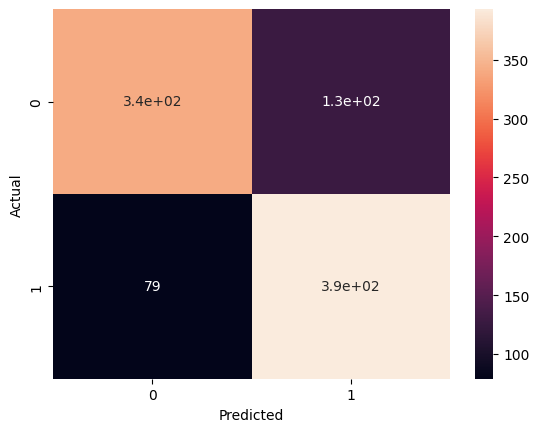

In [157]:
sns.heatmap(multilabel_confusion_matrix(Y_test, y_pred_rf_2)[1], annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_rf');

In [158]:
c_matrix_xgb = confusion_matrix(Y_test, Y_pred_xgb)

In [159]:
print(c_matrix_xgb)

[[316 153]
 [ 72 400]]


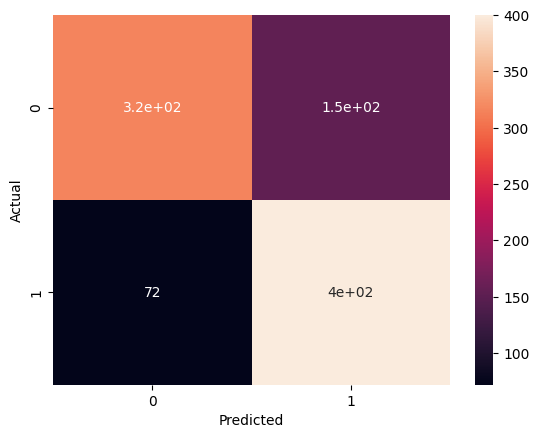

In [160]:
sns.heatmap(multilabel_confusion_matrix(Y_test, Y_pred_xgb)[1], annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb');

Parece que ambas matrices se parecen bastante, pese a tener una diferencia de accuracy notable, generalizan de una forma muy parecida tanto mi *XGBoost*, como mi *Random Forest*. El porcentaje de acierto es bastante alto y en ambos modelos se flaquea sobretodo en los falsos positivos, es decir, los tracks que se consideraron populares cuando no lo eran realmente. 

Finalmente, considero que **XGBoost** me hace un mejor balance que Random Forest, porque generaliza mejor frente a problemas nuevos con la misma cantidad de datos. Random Forest se ajusta demasiado a mi problema original, dejando de lado los nuevos frentes, lo que podría ocasionarnos dificultades en el futuro en un problema de esta clase.

## V. Predicción y resultados finales

Una vez hemos decidido cuál es nuestro mejor apuesta para el problema que estamos tratando de predecir la popularidad de una canción, vamos a visualizar los resultados con otro tipo de gráficas para demostrar la valía de nuestro modelo

En primer lugar utilizamos la función propia de la librería del modelo en la que nos hace una selección de *feature importance*, emplea algo parecido a un histograma horizontal en el que selecciona los atributos de mayor peso sobre la decisión de predicción del target:

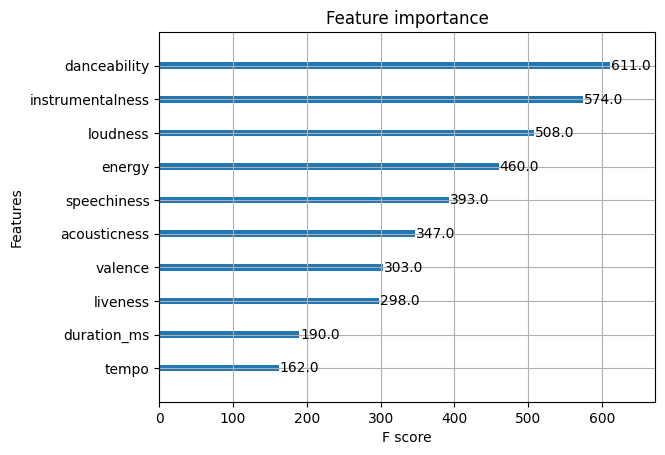

In [161]:
xgb.plot_importance(booster=xgb_clas)
plt.savefig('xgb_feature_importance');

In [162]:
from sklearn.metrics import roc_curve

In [163]:
y_pred_proba = xgb_clas.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)

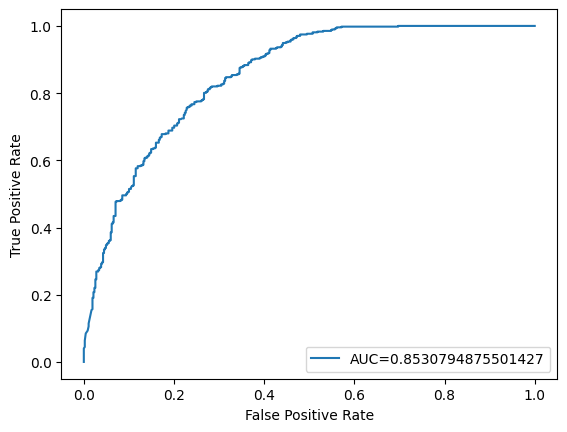

<Figure size 640x480 with 0 Axes>

In [164]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('roc-auc-xgb')

Nuestra curva ROC-AUC nos dice que tenemos una muy buena generalización del modelo, considerando que cuanto más se acerca a 1 el espacio debajo de la curva, mejor performance estaremos obteniendo. Cuanto más se ajusta la curva a la esquina izquierda de la gráfica, mayor será nuestro puntuaje y por tanto mejor nuestro trabajo de clasificación

In [191]:
# cambio el modelo a un archivo de texto
xgb_clas.get_booster().dump_model('xgb_model.txt', with_stats=True)
# leo el contenido del .txt
with open('xgb_model.txt', 'r') as f:
    txt_model = f.read()
print(txt_model)

booster[0]:
0:[loudness<-12.0079994] yes=1,no=2,missing=1,gain=659.903687,cover=752.25
	1:[energy<0.421499997] yes=3,no=4,missing=3,gain=30.4569092,cover=162.5
		3:[speechiness<0.0295000002] yes=7,no=8,missing=7,gain=2.93438721,cover=148
			7:[danceability<0.460000008] yes=15,no=16,missing=15,gain=2.72724104,cover=2.75
				15:leaf=-0.0199998394,cover=1.25
				16:leaf=-0,cover=1.5
			8:[danceability<0.558500051] yes=17,no=18,missing=17,gain=1.57971191,cover=145.25
				17:[acousticness<0.721500039] yes=29,no=30,missing=29,gain=0.17755127,cover=132
					29:[danceability<0.488999993] yes=47,no=48,missing=47,gain=0.799982071,cover=5
						47:leaf=-0.0199999493,cover=4
						48:leaf=-0.00999989919,cover=1
					30:[speechiness<0.0318500027] yes=49,no=50,missing=49,gain=0.392089844,cover=127
						49:leaf=-0.0159999356,cover=2.5
						50:leaf=-0.0199999977,cover=124.5
				18:[acousticness<0.0617499985] yes=31,no=32,missing=31,gain=2.84790039,cover=13.25
					31:leaf=-0,cover=1
					32:[valence

Una vez decantados por nuestro modelo favorito que mejor se ajusta a la problemática inicial de predicción de popularidad de una canción, lo pasamos a programa para poder emplearlo en cualquier pc y darle el uso que queremos

Creamos nuestros modelos con la herramienta pickle para poder pasarlos a un archivo .py

In [166]:
import pickle

In [167]:
with open('model_xgb.pkl', 'wb') as f:
    pickle.dump(xgb_clas, f)

In [168]:
with open('model_rfclf.pkl', 'wb') as f:
    pickle.dump(best_rnd_clf_2, f)

Como conclusión, la problemática inicial ha sido abordada con éxito, trayendo algo útil a la industria musical a la hora de lanzar una nueva pista en cualquier discográfica que extraiga los datos y compare con los que ya tenemos, que Spotify lleva 15 años analizando y compartiendo en su sección para desarrolladores con total libertad. Nos daría las claves para triunfar en el mercado.